<a href="https://colab.research.google.com/github/sreevani-boyapally/github-slideshow/blob/main/TeamUConn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google drive

In [1]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import pandas as pd

keras.__version__

'2.7.0'

# Loading the data

In [3]:
df = pd.read_csv("/content/drive/Shareddrives/SreevaniAshima/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   imageID  1750 non-null   object
 1   disease  1750 non-null   object
dtypes: object(2)
memory usage: 27.5+ KB


# Data Splitting

In [ ]:
 from sklearn.model_selection import train_test_split
 images_train, images_val = train_test_split(df, 
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state = 1)

In [ ]:
 print(images_train.info())
 print(images_val.info())

In [ ]:
 train_cardiomegaly = images_train[images_train['disease'] == 'Cardiomegaly']
 train_not_card = images_train[images_train['disease'] != 'Cardiomegaly']

In [ ]:
 val_cardiomegaly = images_val[images_val['disease'] == 'Cardiomegaly']
 val_not_card = images_val[images_val['disease'] != 'Cardiomegaly']

In [ ]:
 print(train_cardiomegaly.info())
 print(val_cardiomegaly.info())

In [ ]:
 train_cardiomegaly_image = train_cardiomegaly['imageID']
 val_cardiomegaly_image = val_cardiomegaly['imageID']
 train_notcard_image = train_not_card['imageID']
 val_notcard_image = val_not_card['imageID']


In [4]:
image_dir = ("/content/drive/Shareddrives/SreevaniAshima/train/")
base_dir = ("/content/drive/Shareddrives/SreevaniAshima/")

# Copying images into train, validation folders

In [ ]:
 import shutil
 import tensorflow as tf


 tf.io.gfile.mkdir(image_dir + "cardiomegaly")
 tf.io.gfile.mkdir(image_dir + "no_findings")

 tf.io.gfile.mkdir(base_dir + 'validation' + '/' + "cardiomegaly")
 tf.io.gfile.mkdir(base_dir + 'validation' + '/' + "no_findings")

 train_filenames_card = [image_dir + fname for fname in train_cardiomegaly_image]
 train_filenames_notcard = [image_dir + fname for fname in train_notcard_image]
 val_filenames_card = [image_dir + fname for fname in val_cardiomegaly_image]
 val_filenames_notcard = [image_dir + fname for fname in val_notcard_image]

 for fname in train_filenames_card:
   shutil.copy(fname, image_dir + 'cardiomegaly')
    
 for fname in train_filenames_notcard:
   shutil.copy(fname, image_dir + 'no_findings')

 for fname in val_filenames_card:
   shutil.copy(fname, base_dir + 'validation' + '/' + 'cardiomegaly')
    
 for fname in val_filenames_notcard:
   shutil.copy(fname, base_dir + 'validation' + '/' + 'no_findings')

  

# Importing packages

In [5]:
# import general necessary packages
import pandas as pd
import numpy as np
import os, cv2 

# import the necessary packages -- cnn
from keras import layers
from keras import models
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import random as rn

# Model1 - CNN Baseline Model

In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 1))) # this needs to match with our data prep - upcoming!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 128)       7

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [6]:
validation_dir = ("/content/drive/Shareddrives/SreevaniAshima/validation")

In [ ]:
# Using ImageDataGenerator to read images from directories
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        image_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        color_mode='grayscale',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        color_mode='grayscale',
        class_mode='binary')


Found 1400 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 1)
labels batch shape: (20,)


In [ ]:
# Fitting the model using a batch generator
import time
import tensorflow as tf
start = time.time()

tf.random.set_seed(1)

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   restore_best_weights = True)

history = model.fit(
      train_generator,
      steps_per_epoch=15,
      callbacks=[es],
      epochs=150,
      validation_data=validation_generator,
      validation_steps=15)  
                            # Total number of steps (batches of samples) to validate before stopping.

end = time.time()
print(end - start)

Epoch 1/150
15/15 [==============================] - 383s 26s/step - loss: 0.7312 - acc: 0.5100 - val_loss: 0.6925 - val_acc: 0.5200
Epoch 2/150
15/15 [==============================] - 188s 13s/step - loss: 0.6920 - acc: 0.5333 - val_loss: 0.6938 - val_acc: 0.4967
Epoch 3/150
15/15 [==============================] - 117s 8s/step - loss: 0.6930 - acc: 0.5200 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 4/150
15/15 [==============================] - 96s 6s/step - loss: 0.6948 - acc: 0.4800 - val_loss: 0.6927 - val_acc: 0.5033
Epoch 5/150
15/15 [==============================] - 70s 5s/step - loss: 0.6949 - acc: 0.5567 - val_loss: 0.6917 - val_acc: 0.5200
Epoch 6/150
15/15 [==============================] - 59s 4s/step - loss: 0.6942 - acc: 0.4633 - val_loss: 0.6915 - val_acc: 0.5200
Epoch 7/150
15/15 [==============================] - 57s 4s/step - loss: 0.7037 - acc: 0.5800 - val_loss: 0.6839 - val_acc: 0.5100
Epoch 8/150
15/15 [==============================] - 43s 3s/step - loss: 0.695

In [ ]:
test_dir = ("/content/drive/Shareddrives/SreevaniAshima/test")
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  shuffle=False,
                                                  seed=42,
                                                  color_mode='grayscale',
                                                  class_mode=None)

Found 437 images belonging to 1 classes.


In [ ]:
predict = model.predict_generator(eval_generator, steps=np.ceil(437/20))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
predict = model.predict(eval_generator, steps=np.ceil(437/20))

In [ ]:
pre = []
for p in predict:
  if p>0.5:
    pre.append(1)
  elif p<0.5:
    pre.append(0)
    

In [ ]:
predict_df = pd.DataFrame(pre)

In [ ]:
predict_df.to_csv('ans5.csv')

## Plotting the results

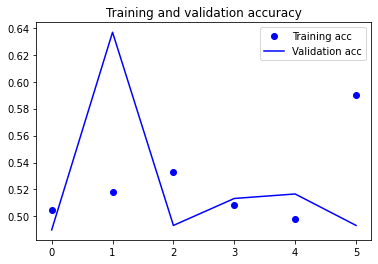

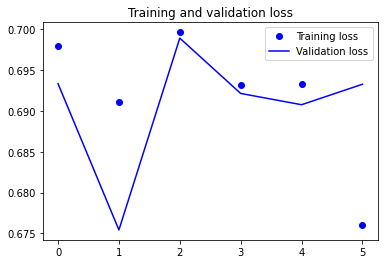

In [ ]:
import matplotlib.pyplot as plt

# plot the results of the model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model2 - CNN with Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 5,
    shear_range=0.2,
    zoom_range=0.4,
    fill_mode = 'nearest',
    samplewise_center=True, samplewise_std_normalization= True)

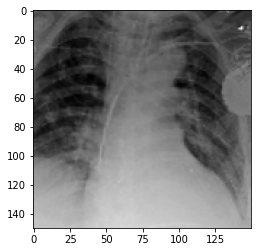

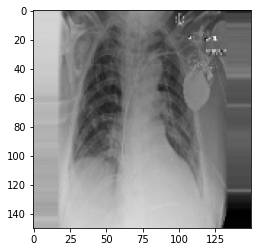

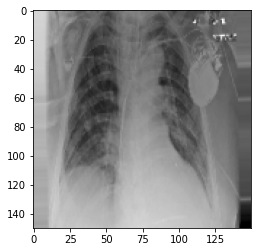

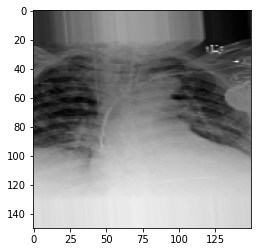

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt


# We pick one image to "augment"
# this was defined above
img_path = image_dir + 'cardiomegaly/00000038_003.png'

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 70, 70, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 33, 33, 128)      

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 5,
    shear_range=0.02,
    zoom_range=0.2,
    samplewise_center=True, samplewise_std_normalization= True)

# Note that the validation data should not be augmented!
# we simply scale it by the max value (255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        image_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        color_mode='grayscale',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        color_mode='grayscale',
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50, 
      epochs=50,
      validation_data=validation_generator,
      validation_steps=15) 

Found 1400 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
50/50 [==============================] - 374s 7s/step - loss: 0.6945 - acc: 0.5060 - val_loss: 0.6930 - val_acc: 0.5600
Epoch 2/50
50/50 [==============================] - 118s 2s/step - loss: 0.6654 - acc: 0.6050 - val_loss: 0.6923 - val_acc: 0.4867
Epoch 3/50
50/50 [==============================] - 90s 2s/step - loss: 0.6405 - acc: 0.6450 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 4/50
50/50 [==============================] - 87s 2s/step - loss: 0.6084 - acc: 0.6690 - val_loss: 0.7425 - val_acc: 0.4800
Epoch 5/50
50/50 [==============================] - 86s 2s/step - loss: 0.5820 - acc: 0.7120 - val_loss: 0.6862 - val_acc: 0.6167
Epoch 6/50
50/50 [==============================] - 86s 2s/step - loss: 0.5598 - acc: 0.7100 - val_loss: 0.6802 - val_acc: 0.5200
Epoch 7/50
50/50 [==============================] - 86s 2s/step - loss: 0.5461 - acc: 0.7360 - val_loss: 0.6831 - val_acc: 0.5733
Epoch 8/50
50/50 [==============================] - 87s 2s/step - loss: 0.5325 - acc: 0.

In [ ]:
test_dir = ("/content/drive/Shareddrives/SreevaniAshima/test")
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  shuffle=False,
                                                  seed=42,
                                                  color_mode='grayscale',
                                                  class_mode=None)

Found 437 images belonging to 1 classes.


In [ ]:
predict = model.predict(eval_generator, steps=np.ceil(437/20))

In [ ]:
pre = []
for p in predict:
  if p>0.5:
    pre.append(1)
  elif p<0.5:
    pre.append(0)
    

In [ ]:
predict_df = pd.DataFrame(pre)

In [ ]:
predict_df.to_csv("/content/drive/Shareddrives/SreevaniAshima/model2.csv")

# Model3 - Trial Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 128)       7

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 5,
    shear_range=0.02,
    zoom_range=0.4,
    horizontal_flip = True,
    vertical_flip = False,
    samplewise_center=True, samplewise_std_normalization= True)

# Note that the validation data should not be augmented!
# we simply scale it by the max value (255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        image_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        color_mode='grayscale',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        color_mode='grayscale',
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50, # 2000/50 = 100 (so we are grabbing 100 batches of size 32)
      epochs=50,
      validation_data=validation_generator,
      validation_steps=15) # so we are grabbing 50 batches of size 32)

Found 1400 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
50/50 [==============================] - 1052s 21s/step - loss: 0.6948 - acc: 0.5110 - val_loss: 0.6930 - val_acc: 0.5067
Epoch 2/50
50/50 [==============================] - 270s 5s/step - loss: 0.6910 - acc: 0.5440 - val_loss: 0.6903 - val_acc: 0.5200
Epoch 3/50
50/50 [==============================] - 144s 3s/step - loss: 0.6773 - acc: 0.5890 - val_loss: 0.7004 - val_acc: 0.4967
Epoch 4/50
50/50 [==============================] - 92s 2s/step - loss: 0.6669 - acc: 0.5990 - val_loss: 0.6829 - val_acc: 0.5633
Epoch 5/50
50/50 [==============================] - 87s 2s/step - loss: 0.6220 - acc: 0.6600 - val_loss: 0.6725 - val_acc: 0.5700
Epoch 6/50
50/50 [==============================] - 87s 2s/step - loss: 0.6658 - acc: 0.5990 - val_loss: 0.6836 - val_acc: 0.5167
Epoch 7/50
50/50 [==============================] - 87s 2s/step - loss: 0.6282 - acc: 0.6600 - val_loss: 0.6786 - val_acc: 0.5367
Epoch 8/50
50/50 [==============================] - 87s 2s/step - loss: 0.6023 - acc:

In [ ]:
test_dir = ("/content/drive/Shareddrives/SreevaniAshima/test")
test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  shuffle=False,
                                                  seed=42,
                                                  color_mode='grayscale',
                                                  class_mode=None)

Found 437 images belonging to 1 classes.


In [ ]:
#predict = model.predict_generator(eval_generator, steps=np.ceil(437/20))

In [ ]:
predict = model.predict(eval_generator, steps=np.ceil(437/20))

In [ ]:
min(predict)

array([0.40303454], dtype=float32)

In [ ]:
pre = []
for p in predict:
  if p>0.5:
    pre.append(1)
  elif p<0.5:
    pre.append(0)
    

In [ ]:
predict_df = pd.DataFrame(pre)

In [ ]:
predict_df.to_csv("/content/drive/Shareddrives/SreevaniAshima/model2_3.csv")